# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [92]:
# Load pickled data
import pickle
import numpy as np
import time

# TODO: Fill this in based on where you saved the training and testing data

data_directory = 'E:\\Self_Driving_Cars\\CarND-Traffic-Sign-Classifier-Project\\'

training_file = data_directory + 'train.p'
validation_file = data_directory + 'valid.p'
testing_file = data_directory + 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [93]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(y_train)

# TODO: Number of validation examples
n_validation = len(y_valid)

# TODO: Number of testing examples.
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = [X_train.shape[i] for i in (1,2,3)]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_test))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = [32, 32, 3]
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [94]:
n_classes/4

10.75

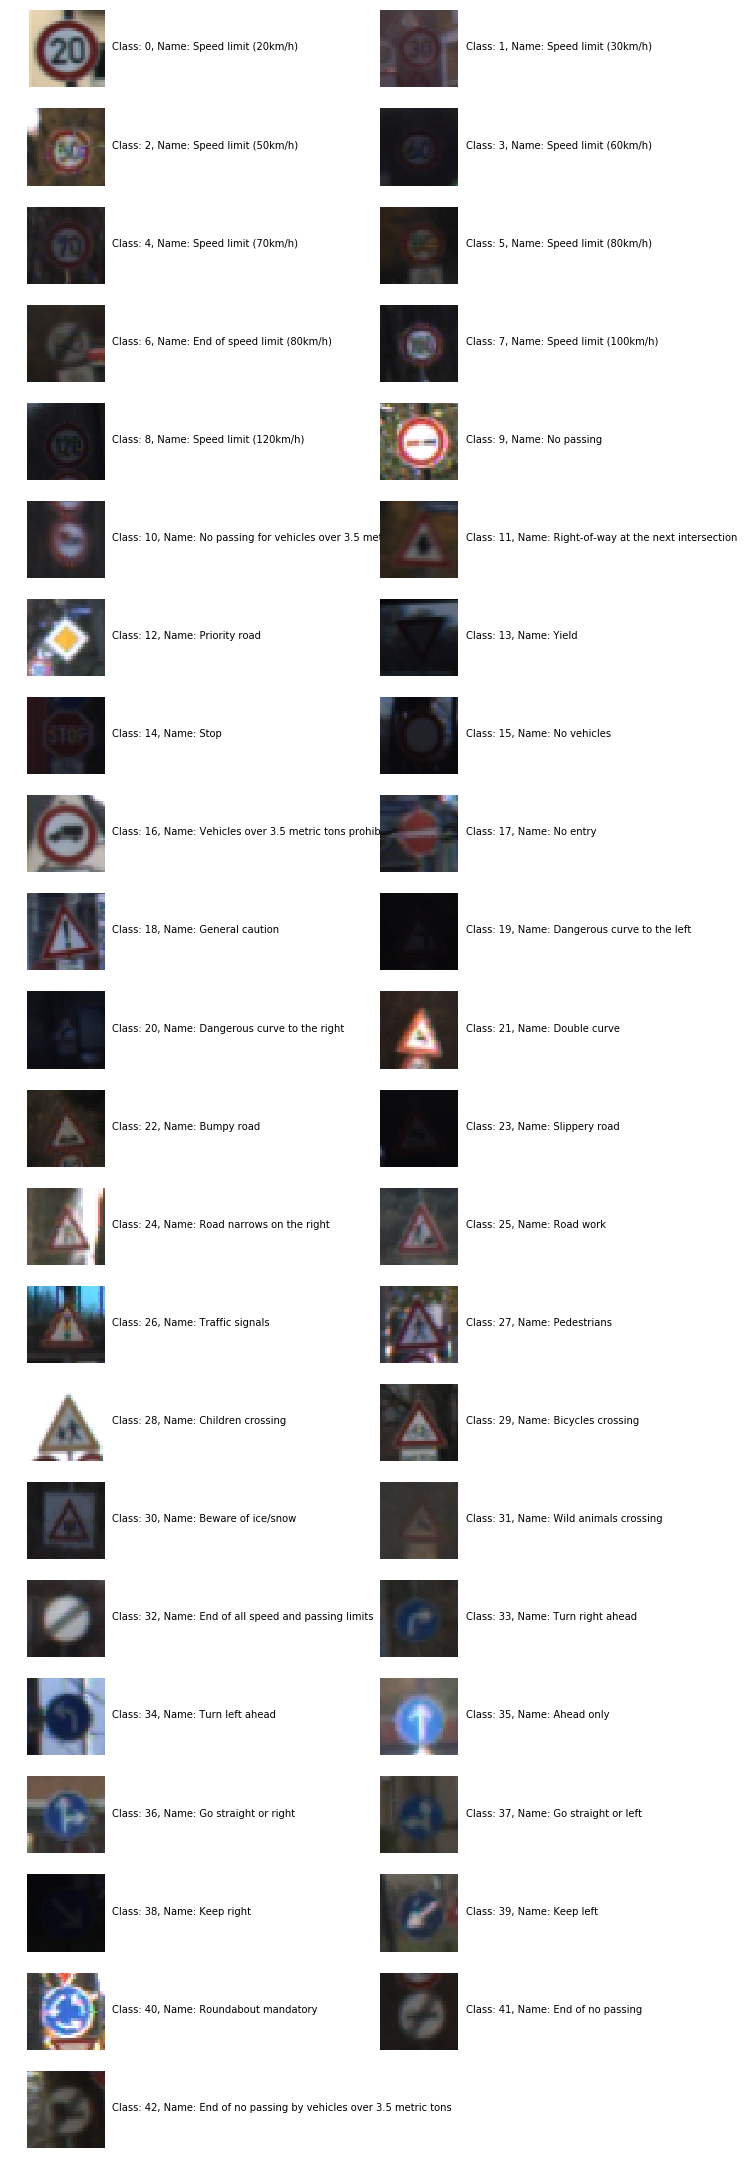

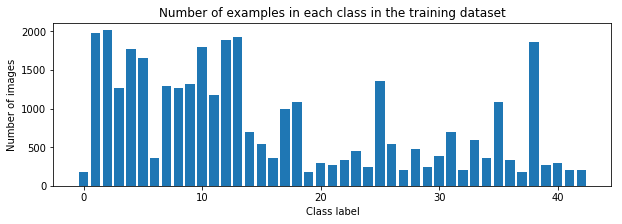

In [111]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import random
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

import csv

# get the sign names from the provided csv file:
sign_names=[]
with open('C:\\Users\\marcbadger.MBCOMP\\Google Drive\\Self_Driving_Cars\\CarND-Traffic-Sign-Classifier-Project\\signnames.csv', 'rt') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=',')
    for row in reader:
        sign_names.append((row['SignName']))

# show an example of each class of sign
#plt.figure(figsize = (10, 20)) # set image size to make it fit on the page
#num_samples_by_class = np.zeros(n_classes) # a vector to keep track
#for i in range(0, n_classes):
#    plt.subplot(np.ceil(n_classes/4), 4, i+1) # a grid with four columns
#    plt.tight_layout(pad = 0.4, w_pad = 0.1, h_pad = 1.5)
#    class_i_examples = X_train[y_train == i] # pick out all examples from class i
#    num_samples_by_class[i] = len(class_i_examples) # record the number of examples of class i
#    plt.imshow(class_i_examples[0].squeeze()) # show just the first example
#    plt.title('Class: {}'.format(i))
#    plt.axis('off')
#plt.show()

# show an example of each class of sign
plt.figure(figsize = (10, 30)) # set image size to make it fit on the page
num_samples_by_class = np.zeros(n_classes) # a vector to keep track
for i in range(0, n_classes):
    plt.subplot(np.ceil(n_classes/2), 2, i+1)
    plt.tight_layout(pad = 0.1, w_pad = 0.4, h_pad = 0)
    class_i_examples = X_train[y_train == i] # pick out all examples from class i
    num_samples_by_class[i] = len(class_i_examples) # record the number of examples of class i
    plt.imshow(class_i_examples[0].squeeze()) # show just the first example
    plt.text(35,16,'Class: {}, Name: {}'.format(i, sign_names[i]))
    plt.axis('off')
plt.show()

# make a histogram showing number of images in each class
plt.figure(figsize = (10, 3))
plt.bar(range(0, n_classes), num_samples_by_class)
plt.title("Number of examples in each class in the training dataset")
plt.xlabel("Class label")
plt.ylabel("Number of images")
plt.show()

#index = random.randint(0, n_train)
#image = X_train[index].squeeze()

#plt.figure(figsize=(1,1))
#plt.imshow(image)
#print(y_train[index])

As you can see, the brightness of the images varies a lot, so there's a good chance that some sort of histogram equalization pre-processing will help.  Alternatively, a more powerful approach is to let the neural network determine the best preprocessing for us.  To do so we need to augment the training data with copies of the training set images with altered brightness, translation, and affine transformations.

Another interesting observation is that the frequency of classes varies by an order of magnitude among classes.  Presumably the distribution in the training set is representative of traffic signs in reality, so giving our classifier a bias towards common signs is probably be a good thing unless there is a case of an uncommon sign that is very very important to not mis-classify (i.e. a false negative of an uncommon but important sign would be bad).  So we'll have to look closely at the confusion matrix to make sure rare, but important (such as wrong way signs) aren't ignored.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [119]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
import cv2

X_train, y_train = shuffle(X_train, y_train)

def normalize_images(image_array):
    images_norm = image_array.copy()
    images_norm = images_norm.astype(np.float32)
    for i in range(0,len(images_norm)-1):
        images_norm[i] = (images_norm[i] - 128)/128
    return images_norm

def normalize_using_CLAHE(img):
    clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize = (8,8))
    cvimage = cv2.convertScaleAbs(img) # convert to the correct format
    cvimage = cv2.cvtColor(cvimage, cv2.COLOR_RGB2HSV)
    h, s, v = cv2.split(cvimage)
    v = clahe.apply(v) # we'll only normalize the brightness channel
    cvimage = cv2.merge((h, s, v))
    cvimage = cv2.cvtColor(cvimage, cv2.COLOR_HSV2RGB)
    return cvimage

def normalize_using_HE(img):
    # Normalize image color channels using histogram equalization
    cvimage = img.copy()
    r, g, b = cv2.split(cvimage)
    r = cv2.equalizeHist(r)
    g = cv2.equalizeHist(g)
    b = cv2.equalizeHist(b)
    cvimage = cv2.merge((r, g, b))
    return cvimage

def normalize_images(image_array):
    # normalize each image using:
    # HE: histogram equalization * gave slightly nicer looking results
    # CLAHE: contrast limiting adaptive histogram equalization
    images_norm = image_array.copy()
    for i in range(0,len(images_norm)-1):
        images_norm[i] = normalize_using_HE(images_norm[i])

    # center the images
    images_norm = images_norm.astype(np.float32)
    for i in range(0,len(images_norm)-1):
        images_norm[i] = (images_norm[i] - 128)/128
        
    return images_norm

X_train = normalize_images(X_train)
print("X_train normalized!")
X_valid = normalize_images(X_valid)
print("X_valid normalized!")
X_test = normalize_images(X_test)
print("X_test normalized!")

X_train normalized!
X_valid normalized!
X_test normalized!


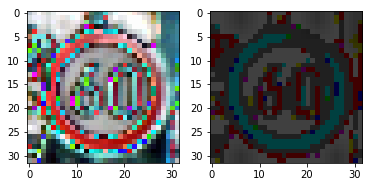

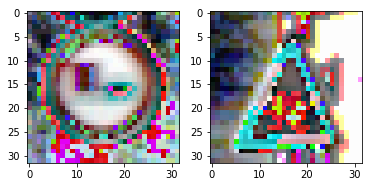

In [120]:
class_3_examples = X_train[y_train == 3]
c3_example = normalize_using_CLAHE(class_3_examples[0])

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(class_3_examples[0])
plt.subplot(1, 2, 2)
plt.imshow(c3_example)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(X_train[10])
plt.subplot(1, 2, 2)
plt.imshow(X_train_norm[10])

# Model Architecture

I first started out with the LeNet model with dropout implemented.  After 60 training epochs, it reached 92 percent accuracy on the validation set.  I then reduced the training rate to 0.0001 and trained for 60 more epochs to reach 94 percent accuracy.

The second model I tried concatenated the output of conv1 and conv2 layers before input to the fully connected layer (following the idea of skip-layer connections or multi-scale features).  Doing so brought the accuracy up to 95.7 percent accuracy after 150 iterations.

In [7]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

# Here are the hyperparameters
mu = 0 # mean of weight initialization
sigma = 0.1 # standard deviation of weight initialization

# Store layers weight & bias
weights = {
    'wc1': tf.Variable(tf.truncated_normal(shape = (5, 5, 3, 32), mean = mu, stddev = sigma)),
    'wc2': tf.Variable(tf.truncated_normal(shape = (5, 5, 32, 64), mean = mu, stddev = sigma)), #[5, 5, 32, 64]
    'wfc1': tf.Variable(tf.truncated_normal(shape = (7872, 1024), mean = mu, stddev = sigma)), #[5*5*64, 1024]
    'out': tf.Variable(tf.truncated_normal(shape = (1024, n_classes), mean = mu, stddev = sigma))} #[1024, n_classes]

biases = {
    'bc1': tf.Variable(tf.truncated_normal([32], mean = mu, stddev = sigma)),
    'bc2': tf.Variable(tf.truncated_normal([64], mean = mu, stddev = sigma)),
    'bfc1': tf.Variable(tf.truncated_normal([1024], mean = mu, stddev = sigma)),
    'out': tf.Variable(tf.truncated_normal([n_classes], mean = mu, stddev = sigma))}

def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='VALID')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='VALID')

def conv_net(x, weights, biases, dropout_keep_prob):
    # Layer 1 - 32*32*3 to 14*14*32
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    conv1 = maxpool2d(conv1, k=2)

    # Layer 2 - 14*14*32 to 5*5*64
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    conv2 = maxpool2d(conv2, k=2)
    
    fc0 = tf.concat([flatten(conv1),flatten(conv2)],1)

    # Fully connected layer - 5*5*64 to 1024
    #fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc0, weights['wfc1']), biases['bfc1'])
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, dropout_keep_prob)

    # Output Layer - class prediction - 1024 to 10
    logits = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return logits


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [8]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

## Inputs and variables
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

dropout_keep_prob = tf.placeholder(tf.float32)
epochs_completed = tf.placeholder(tf.float32)
learning_rate = tf.placeholder(tf.float32)

In [9]:
#global_step = tf.Variable(0, dtype=tf.int32, trainable = False, name = 'global_step')

with tf.device('/gpu:0'):
    logits = conv_net(x, weights, biases, dropout_keep_prob)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels = one_hot_y, logits = logits)
# Loss function using L2 Regularization
#regularizer = tf.nn.l2_loss(weights)
#loss_operation = tf.reduce_mean(loss + beta * regularizer)

loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_operation = optimizer.minimize(loss_operation)
#training_operation = optimizer.minimize(loss_operation, global_step=global_step)

In [10]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(epoch_i, sess, X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy= sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, dropout_keep_prob: 1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [11]:
def print_epoch_stats(epoch_i, sess, X_data, y_data):
    """
    Print cost and validation accuracy of an epoch
    """
    current_loss = sess.run(
        loss_operation,
        feed_dict={x: X_data, labels: y_data})
    valid_accuracy = sess.run(
        accuracy_operation,
        feed_dict={x: X_valid, labels: y_valid})
    print('Epoch: {:<4} - Cost: {:<8.3} Valid Accuracy: {:<5.3}'.format(
        epoch_i,
        current_cost,
        valid_accuracy))

# Training procedure

I trained for 60 epochs with learning rate = 0.001, then noticed that the accuracy had plateued and was not increasing any longer. So I changed the learning rate to 0.0001 and trained for 60 more epochs to achieve a final validation accuracy of 94.3 percent.

I followed the same training procedure for the second network structure (concatenating the outputs from conv1 and conv2 layers).  The second network achieved a validation accuracy to 95.7 percent after 150 iterations.

Saving and loading network structures was not as simple as it seemed and really required a deeper understanding of how TensorFlow variables work and how their values and names are initialized.  It would be great to explore naming/scoping in further detail, particularly in the context of fine-tuning pre-trained models.

In [20]:
# I trained for 60 epochs with learning rate = 0.001, then noticed that the accuracy had plateued and was not increasing any longer.
# SO I changed the learning rate to 0.0001 and trained for 60 more epochs to achieve a final validation accuracy of 94.3 percent.
# Concatenating the outputs from conv1 and conv2 layers improved validation accuracy to 95.2 percent after 180 iterations.
EPOCHS = 60
#val_accuracy = np.ones(EPOCHS)
#EPOCHS_DONE = tf.Vairalbe(0, dtype = tf.int32, trainable = False, name = 'EPOCHS_DONE')
#val_accuracy_history = np.ones(0)
BATCH_SIZE = 128
rate = 0.001
#beta = 0.01

In [121]:
resumeTraining = True
modelName = 'cnn_pyramid_redo'
epochsAlready = 90

time_begin = time.time()
with tf.Session() as sess:
    
    # initialize all variables
    checkpoint = tf.train.latest_checkpoint(data_directory)
    print("checkpoint: {}".format(checkpoint))
    if resumeTraining == False:
        print("Start from scratch")
        saver = tf.train.Saver()
        sess.run(tf.global_variables_initializer())
    elif  checkpoint:
        print("Restoring from checkpoint {}".format(checkpoint))
        saver = tf.train.import_meta_graph(checkpoint + '.meta')
        saver.restore(sess, checkpoint)
    else:
        print("No checkpoints exist! Starting over.")
        saver = tf.train.Saver()
        sess.run(tf.global_variables_initializer())
        
    #sess.run(tf.global_variables_initializer())
    #saver = tf.train.import_meta_graph(data_directory + 'cnn1-60.meta')
    #saver.restore(sess, tf.train.latest_checkpoint(data_directory))

    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, dropout_keep_prob: 0.5, learning_rate: rate})
            
        validation_accuracy = evaluate(i, sess, X_valid, y_valid)
        #val_accuracy[i] = validation_accuracy
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Time: {}".format(time.time() - time_begin))
        print()
        
        if (i+1) % 10 == 0:
            saver.save(sess, data_directory + modelName, global_step = i+1+epochsAlready)
            print("Model saved")
        
        if (i+1+epochsAlready) == 40:
            rate = rate * 0.1
        
    #EPOCHS_DONE += EPOCHS
    #val_accuracy_history = np.append(val_accuracy_history, val_accuracy)
    
    #saver.save(sess, './lenet', global_step = EPOCHS)
    saver.save(sess, data_directory + modelName, global_step = EPOCHS + epochsAlready)
    print("Model saved")


checkpoint: E:\Self_Driving_Cars\CarND-Traffic-Sign-Classifier-Project\cnn_pyramid_redo-90
Restoring from checkpoint E:\Self_Driving_Cars\CarND-Traffic-Sign-Classifier-Project\cnn_pyramid_redo-90
INFO:tensorflow:Restoring parameters from E:\Self_Driving_Cars\CarND-Traffic-Sign-Classifier-Project\cnn_pyramid_redo-90
Training...

EPOCH 1 ...
Validation Accuracy = 0.558
Time: 77.56131386756897

EPOCH 2 ...
Validation Accuracy = 0.735
Time: 121.39475107192993

EPOCH 3 ...
Validation Accuracy = 0.814
Time: 165.1909375190735

EPOCH 4 ...
Validation Accuracy = 0.841
Time: 209.18526005744934

EPOCH 5 ...
Validation Accuracy = 0.870
Time: 252.79956984519958

EPOCH 6 ...
Validation Accuracy = 0.882
Time: 296.6819705963135

EPOCH 7 ...
Validation Accuracy = 0.896
Time: 340.05485439300537

EPOCH 8 ...
Validation Accuracy = 0.893
Time: 383.63827776908875

EPOCH 9 ...
Validation Accuracy = 0.911
Time: 427.66036200523376

EPOCH 10 ...
Validation Accuracy = 0.914
Time: 471.8540093898773

Model saved
E

In [ ]:
rate

In [24]:
tf.train.get_checkpoint_state(data_directory)

model_checkpoint_path: "E:\\Self_Driving_Cars\\CarND-Traffic-Sign-Classifier-Project\\cnn_pyramid_redo-90"
all_model_checkpoint_paths: "E:\\Self_Driving_Cars\\CarND-Traffic-Sign-Classifier-Project\\cnn_pyramid_redo-50"
all_model_checkpoint_paths: "E:\\Self_Driving_Cars\\CarND-Traffic-Sign-Classifier-Project\\cnn_pyramid_redo-60"
all_model_checkpoint_paths: "E:\\Self_Driving_Cars\\CarND-Traffic-Sign-Classifier-Project\\cnn_pyramid_redo-70"
all_model_checkpoint_paths: "E:\\Self_Driving_Cars\\CarND-Traffic-Sign-Classifier-Project\\cnn_pyramid_redo-80"
all_model_checkpoint_paths: "E:\\Self_Driving_Cars\\CarND-Traffic-Sign-Classifier-Project\\cnn_pyramid_redo-90"

In [178]:
with tf.Session() as sess:
    saver = tf.train.import_meta_graph(data_directory + 'cnn_pyramid_redo-90.meta')
    saver.restore(sess, tf.train.latest_checkpoint(data_directory))
    sess = tf.get_default_session()
    
    test_accuracy = evaluate(120, sess, X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from E:\Self_Driving_Cars\CarND-Traffic-Sign-Classifier-Project\cnn_pyramid_redo-150
Test Accuracy = 0.941


In [149]:
def getConfusionMatrix(sess, X_data, y_data): 
    num_examples = len(X_data)    
    counts = np.zeros([n_classes,n_classes])
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        predictions = sess.run(tf.argmax(logits, 1), feed_dict={x: batch_x, y: batch_y, dropout_keep_prob: 1.0})
        for i in range(0, len(predictions)):
            counts[batch_y[i],predictions[i]] += 1
            
    return counts

In [174]:
with tf.Session() as sess:
    saver = tf.train.import_meta_graph(data_directory + 'cnn_pyramid_redo-90.meta')
    saver.restore(sess, tf.train.latest_checkpoint(data_directory))
    sess = tf.get_default_session()
    confusion_matrix = getConfusionMatrix(sess, X_test_norm, y_test)

INFO:tensorflow:Restoring parameters from E:\Self_Driving_Cars\CarND-Traffic-Sign-Classifier-Project\cnn_pyramid_redo-150


In [175]:
# Borrowing a confusion matrix plotting function from a scikit-learn example:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    plt.tick_params(labelsize=20)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 1.3
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{0:.2f}".format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix
[[ 0.72  0.1   0.   ...,  0.    0.    0.  ]
 [ 0.    0.96  0.02 ...,  0.    0.    0.  ]
 [ 0.    0.    0.99 ...,  0.    0.    0.  ]
 ..., 
 [ 0.    0.    0.   ...,  0.86  0.    0.  ]
 [ 0.    0.    0.   ...,  0.    0.77  0.02]
 [ 0.    0.    0.   ...,  0.    0.    0.94]]


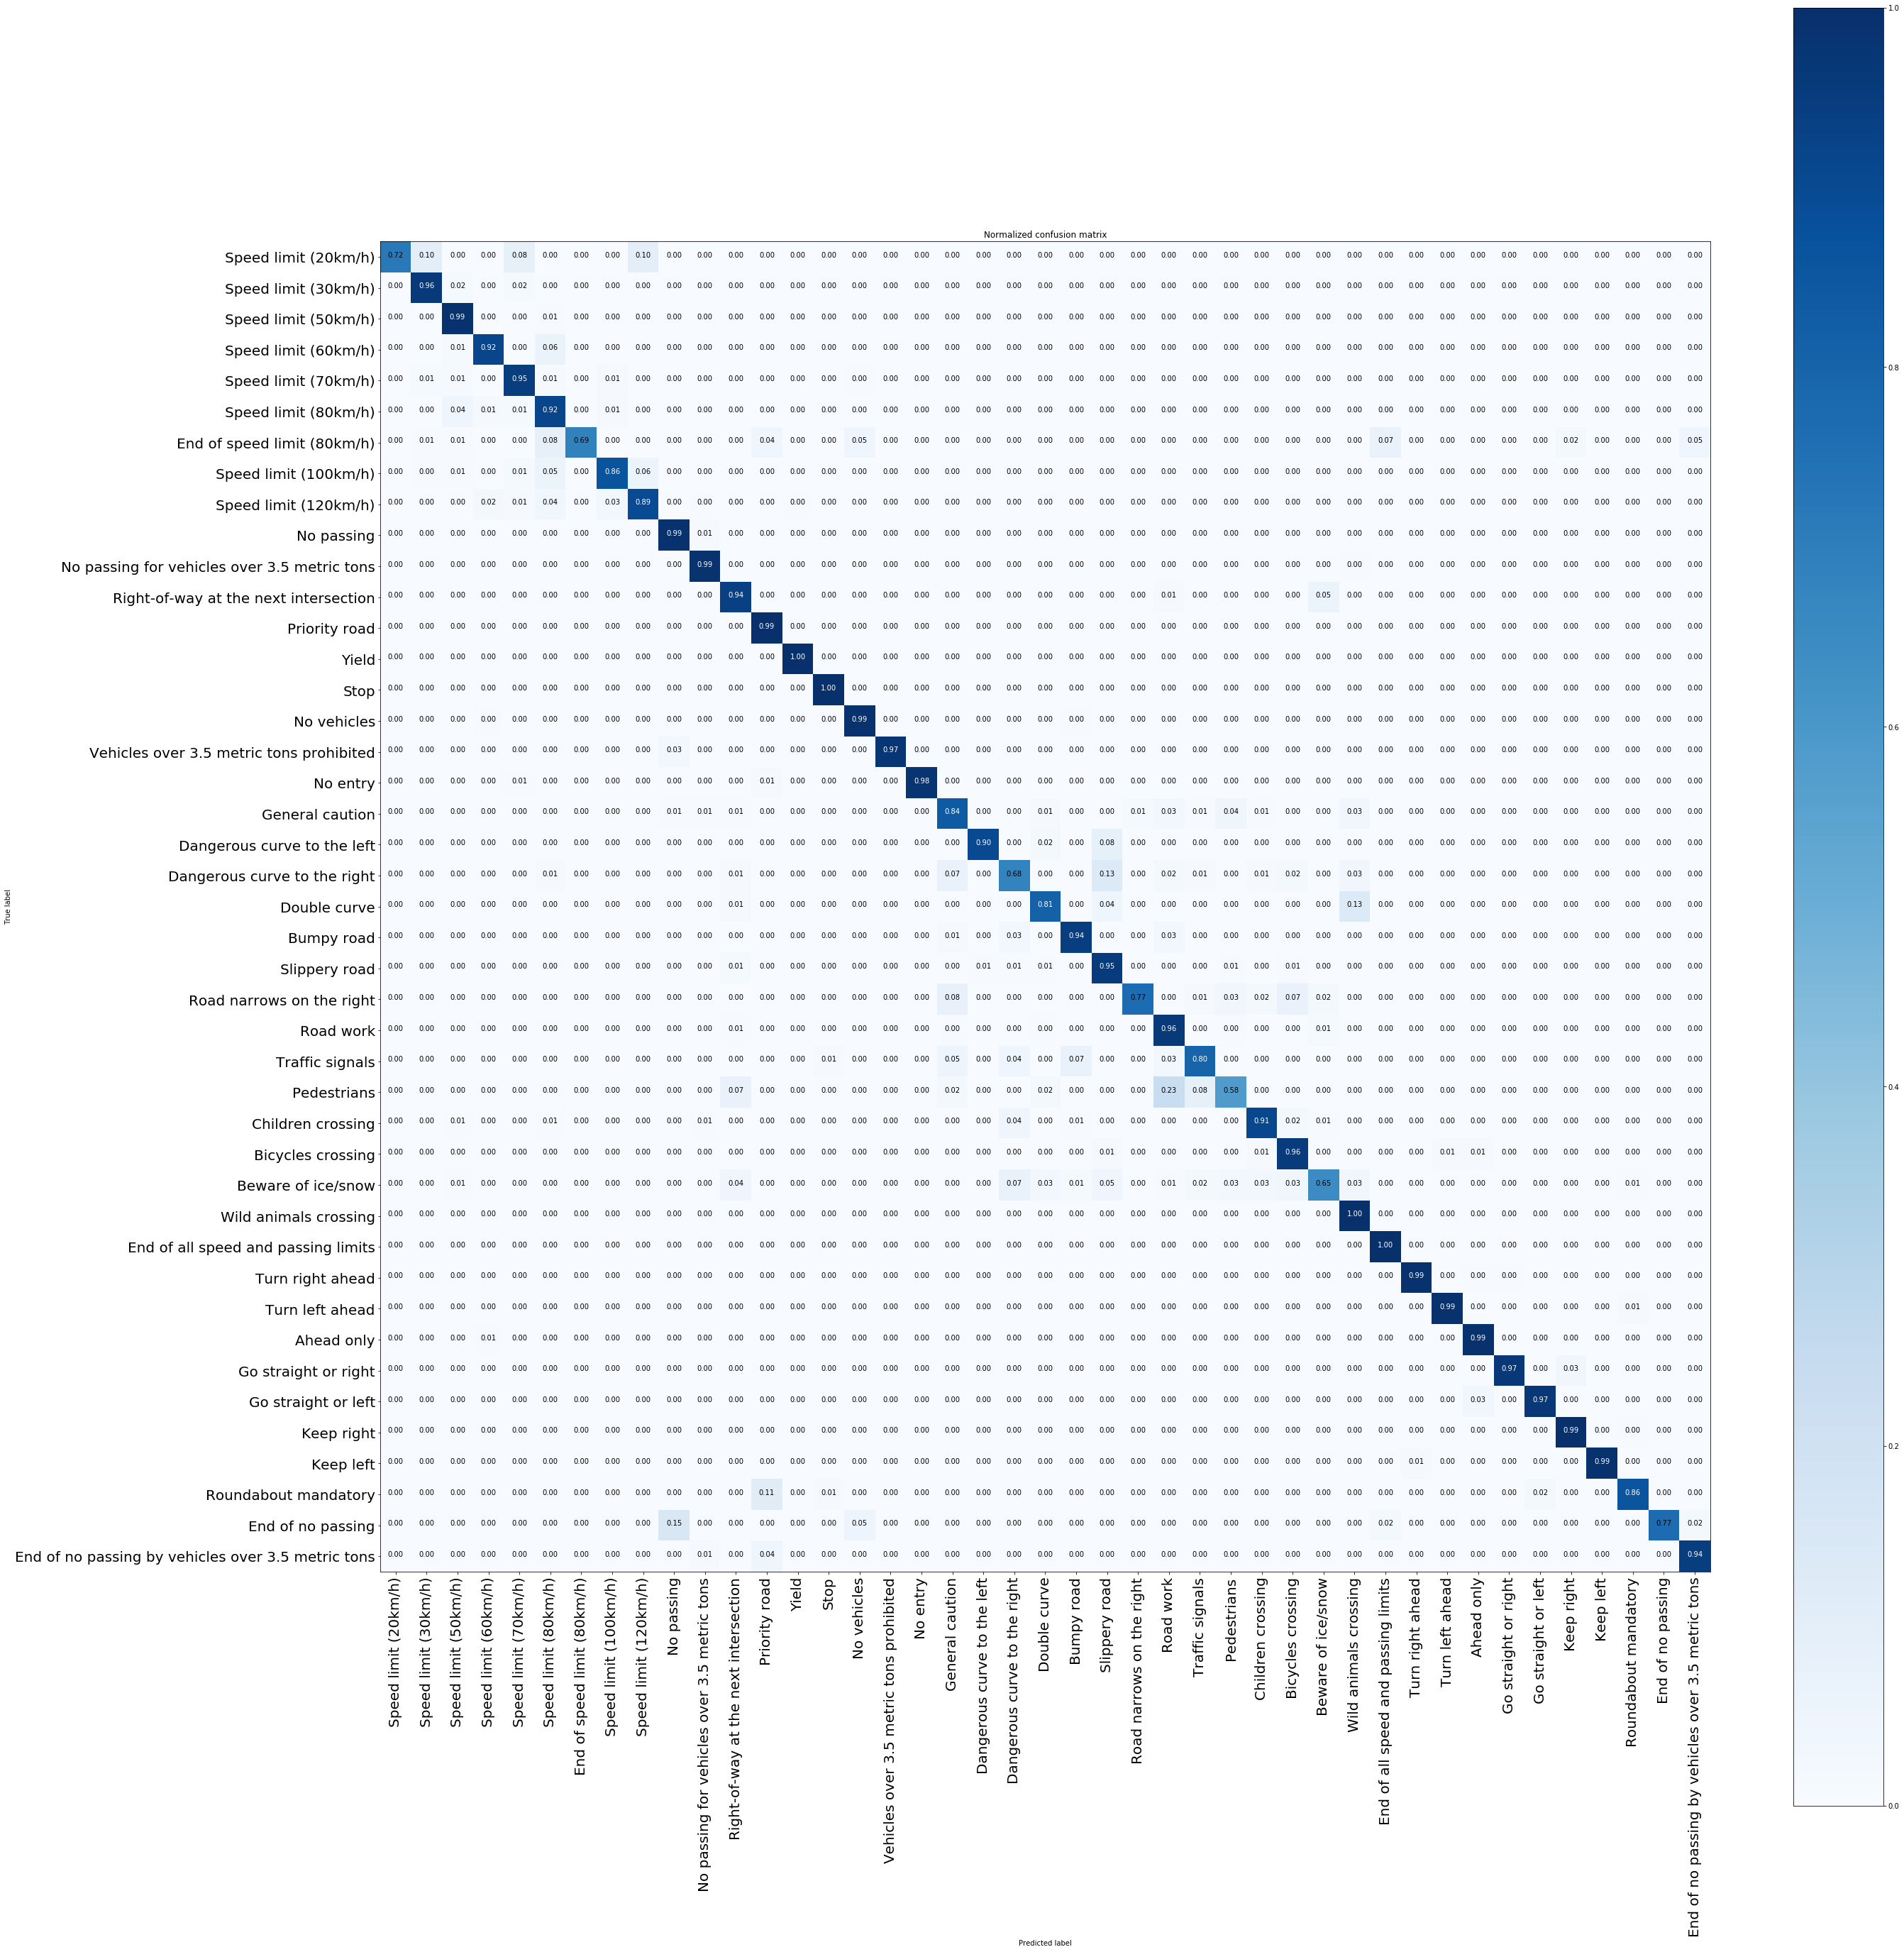

In [176]:
import csv
import itertools

sign_names=[]
with open('C:\\Users\\marcbadger.MBCOMP\\Google Drive\\Self_Driving_Cars\\CarND-Traffic-Sign-Classifier-Project\\signnames.csv', 'rt') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=',')
    for row in reader:
        sign_names.append((row['SignName']))

confusion_matrix_norm = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize = [40,40])
np.set_printoptions(precision=2)
plot_confusion_matrix(confusion_matrix_norm, classes=sign_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Performance on the test set is generally very good.  It's great that stopsigns are not confused with anything else and vica versa.  A mildly concerning error is that "End of no passing" sings are frequently (15%) labeled as "No passing signs", but this is much better than the reverse (i.e. passing when the sign told you not to)!  "Pedestirans" signs are also sometimes misclassified as "Right of way at the next intersection" signs, which is a bit troubling.

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [139]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import glob
from math import ceil
from math import floor
imageNames = glob.glob('C:\\Users\\marcbadger.MBCOMP\\Google Drive\\Self_Driving_Cars\\CarND-Traffic-Sign-Classifier-Project\\writeup files\\own_examples\\*.PNG')

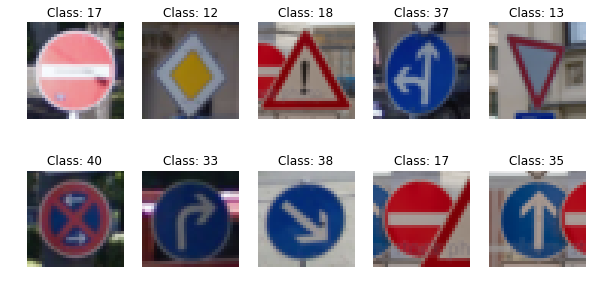

In [140]:
def importAndReshape(filename):
    image = misc.imread(filename)
    image = image[:,:,:3] # discard the alpha channel of the png file
    imsize = image.shape
    imsize = [imsize[i] for i in (0, 1)]
    im32 = misc.imresize(image, 32/min(imsize))
    h, w, _ = im32.shape
    cropbot = h-floor(max([0,h-32])/2)
    croptop = h-ceil(max([0,h-32])/2)
    cropleft = w-floor(max([0,w-32])/2)
    cropright = w-ceil(max([0,w-32])/2)
    middleh = h//2-(cropbot//2)
    middlew = w//2-(cropleft//2) 
    im32 = im32[(middleh-cropbot):(middleh+croptop),(middlew-cropleft):(middlew+cropright)]
    return im32.astype('uint8')

from scipy import misc
import matplotlib.pyplot as plt


num_examples = len(imageNames)
X_real = np.zeros([num_examples, 32, 32, 3], dtype = 'uint8')
y_real = np.array([17, 12, 18, 37, 13, 40, 33, 38, 17, 35])

plt.figure(figsize = (10, 5))
for i in range(0, num_examples):
    example = importAndReshape(imageNames[i])
    X_real[i,:,:,:] = example
    plt.subplot(np.ceil(num_examples/5), 5, i+1) # a grid with four columns
    plt.imshow(example) # show just the first example
    plt.title('Class: {}'.format(y_real[i]))
    plt.axis('off')
plt.show()

I expect most of these signs to beasy as they are higher quality than many of those in the training data.  The "Yield" sign (Class 13 above) might be slightly more difficult because it is at a slight angle, and no augmentation of the training data was performed (in particular no affine transformations were performed).  Other difficult signs could be the "General caution" sign with the "No entry" sign in the background, the "No entry" sign that is partially occluded by a "General caution" sign and the "Ahead only" sign that is partially occluded by the "No entry" sign. I have also included an impossible sign "No Roundabout" which isn't in the training dataset.

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

Please see the Analyze Performance section below!

In [ ]:
X_real_norm = normalize_images(X_real)

### Analyze Performance

In [144]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

with tf.Session() as sess:
    saver = tf.train.import_meta_graph(data_directory + 'cnn_pyramid_redo-90.meta')
    saver.restore(sess, tf.train.latest_checkpoint(data_directory))
    sess = tf.get_default_session()
    test_accuracy = evaluate(90, sess, X_real_norm, y_real)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from E:\Self_Driving_Cars\CarND-Traffic-Sign-Classifier-Project\cnn_pyramid_redo-150
Test Accuracy = 0.900


In [123]:
def get_top_5(X_data, sess): 
    prob = sess.run(tf.nn.softmax(logits), feed_dict={x: X_real, dropout_keep_prob: 1.0})    
    top_5 = tf.nn.top_k(prob, k=5)
    return sess.run(top_5)

with tf.Session() as sess:
    saver = tf.train.import_meta_graph(data_directory + 'cnn_pyramid_redo-90.meta')
    saver.restore(sess, tf.train.latest_checkpoint(data_directory))
    sess = tf.get_default_session()
    signs_top_5=get_top_5(X_real, sess)

INFO:tensorflow:Restoring parameters from E:\Self_Driving_Cars\CarND-Traffic-Sign-Classifier-Project\cnn_pyramid_redo-150


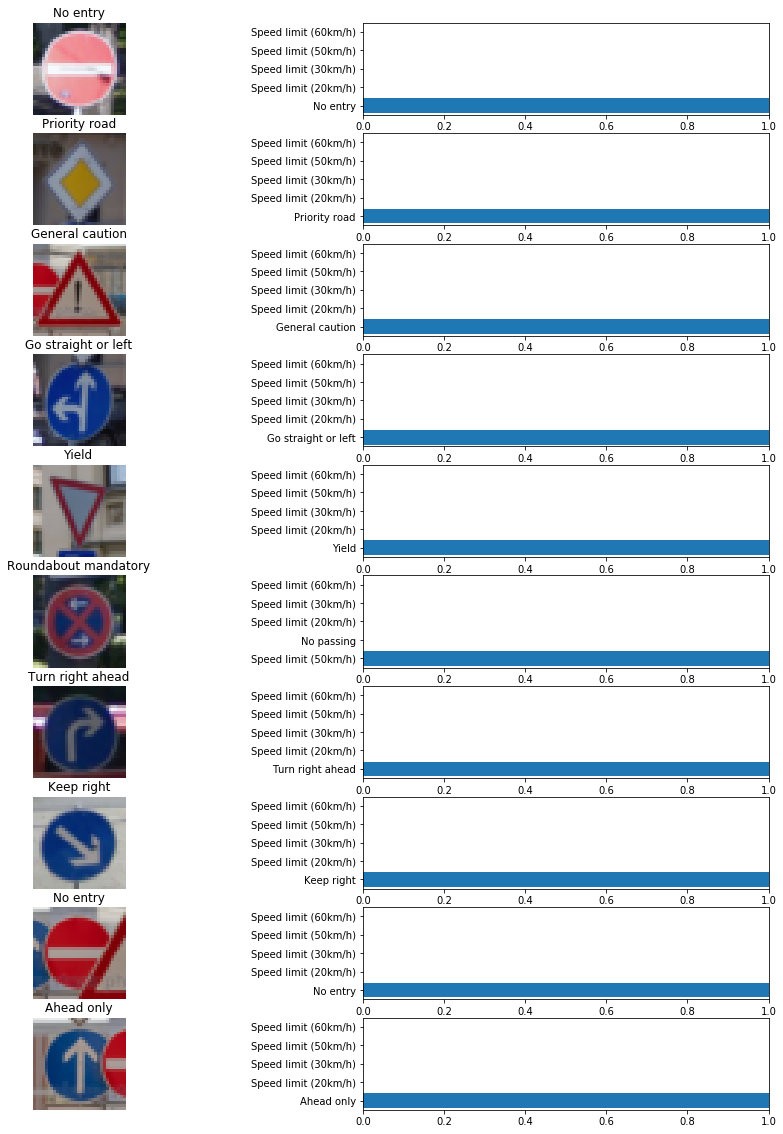

In [143]:
import csv

sign_names=[]
with open('C:\\Users\\marcbadger.MBCOMP\\Google Drive\\Self_Driving_Cars\\CarND-Traffic-Sign-Classifier-Project\\signnames.csv', 'rt') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=',')
    for row in reader:
        sign_names.append((row['SignName']))

# Plot the probabilities
plt.figure(figsize=(16, 20))
for i in range(0, num_examples):
    plt.subplot(10, 2, 2*i+1)
    plt.imshow(X_real[i]) 
    plt.title(sign_names[y_real[i]])
    plt.axis('off')
    plt.subplot(10, 2, 2*i+2)
    plt.barh(np.arange(1, 6, 1), signs_top_5.values[i, :])
    labs=[sign_names[j] for j in signs_top_5.indices[i]]
    plt.axis([0, 1, 0.5, 5.5])
    plt.yticks(np.arange(1, 6, 1), labs)
plt.show()

Looking at the top-5 probabilities for each of the new signs, the network (which achieved 95% accuracy on the validation set) got every new example correct except the "No Roundabout" sign, which isn't even represented in the training data.  It's a bit concerning that it classified it as nearly 100% "Speed limit 50km/h".  If you look at the probabilities below, it is the only one with two entries with greater than 0.00e+00 probability.  Ideally, the classifier would be confident when it is correct and unconfident when it is incorrect.  The classifier also seems to have a lot of trouble with speed limit signs.  It's second best guess for most signs is some version of a speed limit sign.  I bet that most of the speed limit signs have very low precision because the network is giving a lot of false positivies.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [169]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
signs_top_5

TopKV2(values=array([[  1.00e+00,   0.00e+00,   0.00e+00,   0.00e+00,   0.00e+00],
       [  1.00e+00,   0.00e+00,   0.00e+00,   0.00e+00,   0.00e+00],
       [  1.00e+00,   0.00e+00,   0.00e+00,   0.00e+00,   0.00e+00],
       [  1.00e+00,   0.00e+00,   0.00e+00,   0.00e+00,   0.00e+00],
       [  1.00e+00,   0.00e+00,   0.00e+00,   0.00e+00,   0.00e+00],
       [  1.00e+00,   6.61e-07,   0.00e+00,   0.00e+00,   0.00e+00],
       [  1.00e+00,   0.00e+00,   0.00e+00,   0.00e+00,   0.00e+00],
       [  1.00e+00,   0.00e+00,   0.00e+00,   0.00e+00,   0.00e+00],
       [  1.00e+00,   0.00e+00,   0.00e+00,   0.00e+00,   0.00e+00],
       [  1.00e+00,   0.00e+00,   0.00e+00,   0.00e+00,   0.00e+00]], dtype=float32), indices=array([[17,  0,  1,  2,  3],
       [12,  0,  1,  2,  3],
       [18,  0,  1,  2,  3],
       [37,  0,  1,  2,  3],
       [13,  0,  1,  2,  3],
       [ 2,  9,  0,  1,  3],
       [33,  0,  1,  2,  3],
       [38,  0,  1,  2,  3],
       [17,  0,  1,  2,  3],
       [35

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")